In [1]:
#Unigram and bigram code goes here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
# import re

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Importing dataset
trainDf = pd.read_csv('train_processed.csv', sep = ',')
testDf = pd.read_csv('test_processed.csv', sep = ',')

In [4]:
trainDf.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [5]:
# c = trainDf[["0.1"]]
# c.head()

In [6]:
tweetsTrain = pd.DataFrame(trainDf)
tweetsTrain.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [7]:
trainTweetsProc = [] # Creating an empty list to store the data set above.
i = 0
while i < tweetsTrain.shape[0]:
    trainTweetsProc.append([tweetsTrain.iloc[i,1], tweetsTrain.iloc[i,2], tweetsTrain.iloc[i,3]]) # Adds each row to the list, excluding the first column of the data set.
    i += 1

trainTweetsP = pd.DataFrame(trainTweetsProc) # Casts the list to a data frame, which is cleaned.
trainTweetsP.head()

,0,1,2
0,1,0,USER_MENTION when a father is dysfunctional an...
1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in urð
4,5,0,factsguide society now motivation


In [8]:
tweetsTraining = trainTweetsP[[2]] # Extracts the tweets column from the clean data frame above.
tweetsTraining.head()

,2
0,USER_MENTION when a father is dysfunctional an...
1,USER_MENTION USER_MENTION thanks for lyft cred...
2,bihday your majesty
3,model i love u take with u all the time in urð
4,factsguide society now motivation


In [9]:
tweetTrainingList = [] # Creating an empty list to store the tweets.
i = 0
while i < tweetsTraining.shape[0]:
    tweetTrainingList.append(tweetsTraining.iloc[i,0]) # Adds each tweet to the list.
    i += 1

In [10]:
stringOfTrainTweets = " ".join(tweetTrainingList) # Joins the tweets together into one giant string, with a space between every two consecutive tweets.

In [11]:
#Creating Unigram

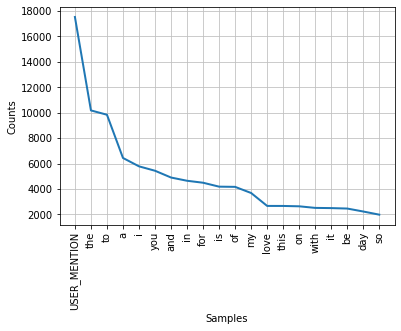

In [12]:
#Plotting unigram
# r = trainDf[["0.1"]]
# trainDf_string = trainDf.to_string()
#creating tokens
tokens = word_tokenize(stringOfTrainTweets)
vocab = set(tokens)
frequencyDist = nltk.FreqDist(tokens)
data = sorted(frequencyDist,key=frequencyDist.__getitem__, reverse=True)
data[0:20]
frequencyDist.plot(20, cumulative=False)

In [13]:
# len(vocab) = 41571
# So, proportionally num. of sparse vector = 3440
#and num of dense vector = 20,650

In [14]:
sparseVector = data[0:3440]
denseVector = data[0:20650]

In [15]:
# def generate_ngrams(s, n):
    
#     # Replace all none alphanumeric characters with spaces
#     s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
#     # Break sentence in the token, remove empty tokens
#     tokens = [token for token in s.split(" ") if token != ""]
    
#     # Use the zip function to help us generate n-grams
#     # Concatentate the tokens into ngrams and return
#     ngrams = zip(*[token[i:] for i in range(n)])
#     return [" ".join(ngram) for ngram in ngrams]

In [16]:
# a = 'today was so cool. i did nothing. amazing, right?'

In [17]:
# generate_ngrams(a, n=2)

In [18]:
# b = 'time to go home! next time, we will go to the cinema. how does that sound? do you want to go to the cinema?'

In [19]:
#Trial : To be del.
tokens = [token for token in stringOfTrainTweets.split(" ") if token != ""]
output = list(ngrams(tokens, 2))

In [20]:
output[0:10]

[('USER_MENTION', 'when'),
 ('when', 'a'),
 ('a', 'father'),
 ('father', 'is'),
 ('is', 'dysfunctional'),
 ('dysfunctional', 'and'),
 ('and', 'is'),
 ('is', 'so'),
 ('so', 'selfish'),
 ('selfish', 'he')]

In [21]:
bigrams = set(output)
frequency_dist = nltk.FreqDist(output)
data = sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
data[0:20]

[('USER_MENTION', 'USER_MENTION'),
 ('i', 'am'),
 ('in', 'the'),
 ('to', 'be'),
 ('of', 'the'),
 ('all', 'the'),
 ('for', 'the'),
 ('fathers', 'day'),
 ('USER_MENTION', 'i'),
 ('i', 'love'),
 ('to', 'the'),
 ('to', 'do'),
 ('thankful', 'for'),
 ('am', 'thankful'),
 ('you', 'will'),
 ('thankful', 'positive'),
 ('the', 'time'),
 ('to', 'see'),
 ('on', 'the'),
 ('this', 'is')]

In [22]:
len(data)

206650

In [23]:
len(bigrams)

206650

In [24]:
bigramsVocab = data[0:1060]

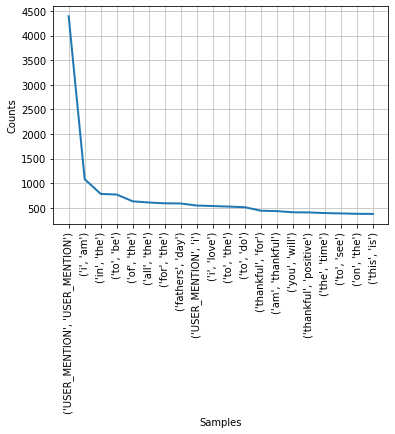

In [25]:
frequency_dist.plot(20, cumulative=False)

# Mihir

# Vaibhav

In [26]:
#Feature representation: Dense vector represenatation
# num of dense vector = 20,650

In [27]:
import gensim
from gensim.models import Word2Vec

In [59]:
def convListtoList(lst):
    bigList = []
    for i in lst:
        sub = i.split(', ')
        bigList.append(sub)
    return (bigList)

In [63]:
sentences = convListtoList(tweetTrainingList)

In [71]:
len(tweetTrainingList)

31962

In [ ]:
le

In [81]:
model = gensim.models.Word2Vec(sentences, min_count = 2)

In [82]:
vocabulary = model.wv.vocab  

In [85]:
vocabulary

{'bihday your majesty': <gensim.models.keyedvectors.Vocab at 0x1a1df0ab00>,
 'model i love u take with u all the time in urð': <gensim.models.keyedvectors.Vocab at 0x1a1e744630>,
 'i am thankful for having a paner thankful positive': <gensim.models.keyedvectors.Vocab at 0x1a1e744550>,
 'USER_MENTION tgif ff to my gamedev indiedev indiegamedev squad USER_MENTION USER_MENTION USER_MENTION USER_MENTION USER_MENTION': <gensim.models.keyedvectors.Vocab at 0x1a1e744518>,
 'taylorswift1989 bull up you will dominate your bull and you will direct it whatever you want it to do w': <gensim.models.keyedvectors.Vocab at 0x1a1e7444e0>,
 'i am thankful for sunshine thankful positive': <gensim.models.keyedvectors.Vocab at 0x1a1e7444a8>,
 'whenever im and something goes wrong': <gensim.models.keyedvectors.Vocab at 0x1a1e744470>,
 'happy at work conference right mindset leads to cultureofdevelopment organizations work mindset': <gensim.models.keyedvectors.Vocab at 0x1a1e744438>,
 'USER_MENTION if you lu

In [91]:
w1 = "USER_MENTION its tragic that this america continues to be okay seeing innocent people die to line the pockets of the nra"
model.wv.most_similar(positive=w1)

[('thursdaythoughts from USER_MENTION choose everyday', 0.3481942415237427),
 ('i am lucky i_am positive affirmation', 0.2729114592075348),
 ('love instagood photooftheday toptags tbt cute me beautiful followme',
  0.2697490453720093),
 ('USER_MENTION lt3 lt3 listen to my most beautiful best friend USER_MENTION singing with her most amazing voice lt3 lt3 lt3 lt3',
  0.2631867825984955),
 ('macbook gorilla simulator you need to do to adapt to the environment the need to tear the city materia',
  0.258632093667984),
 ('the end of me selfie love messi cr7 religion christianity mecca_live',
  0.25607866048812866),
 ('happy by pharrell williams pharrellwilliams lyrics', 0.24625764787197113),
 ('my bihday muza production byâ', 0.24117645621299744),
 ('i am thankful for hiking trails thankful positive', 0.23421594500541687),
 ('youre only young once so stop worrying and be', 0.22940050065517426)]